In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with gzip.open('mnist.pkl.gz', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    train_set, valid_set, test_set = u.load()

In [2]:
def one_hot(vector):
    return np.array([[1 if j == vector[i] else 0 for j in range(10)]
                     for i in range(len(vector))])

In [3]:
X_train, y_train = np.array(train_set[0]).reshape(-1, 28, 28)[...,None], one_hot(np.array(train_set[1]))
X_val, y_val = np.array(valid_set[0]).reshape(-1, 28, 28)[...,None], one_hot(np.array(valid_set[1]))
X_test, y_test = np.array(test_set[0]).reshape(-1, 28, 28)[...,None], one_hot(np.array(test_set[1]))

In [4]:
from models import ConvNet
import tensorflow as tf

model = ConvNet(training_epochs=50, image_shape=(28,28), n_classes=10)

model.conv2d('L1', kernel_size=5, depth=6)
model.pool2d('MAX')

model.conv2d('L2', kernel_size=3, depth=16)
model.pool2d('MAX')

model.fully_connected('FC2', depth=1024)
model.dropout()

model.fully_connected('OUT', depth=10, ACTIVATION=None)

In [5]:
model.train(train=(X_train, y_train), val=(X_test, y_test))

Starting TensorFlow session...
 Epoch: 0050 | Accuracy: 0.978710949 | Change: -0.001269519
Optimization Finished!! Training time: 00h:01m:58s


0.9899

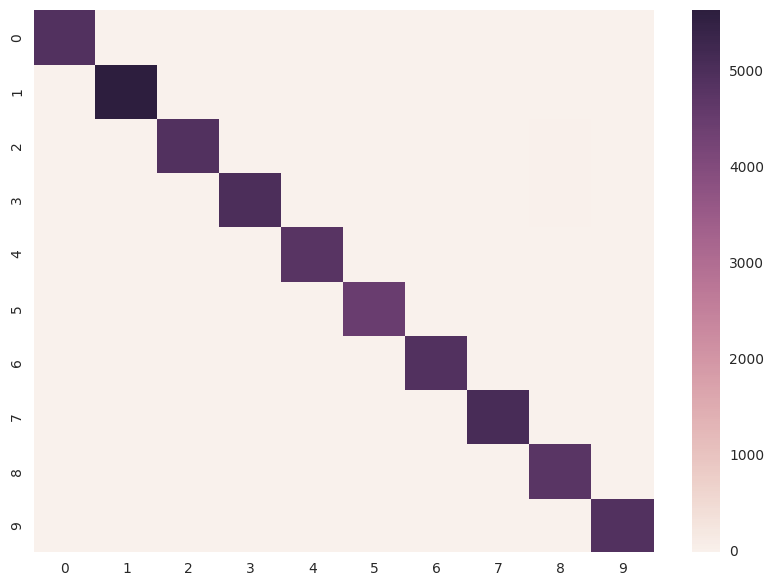

In [6]:
model.score(X_train, y_train, plot=True)